A danger of `scikit-learn` is, with all its black boxes, we&rsquo;ll simply use the boxes without ever peeking inside and understanding how things work.  Let&rsquo;s peek inside `KMeans` by reimplementing this with `numpy`.



In [1]:
import numpy as np

## Recall how we used KMeans



We produce some random data.



In [2]:
from sklearn.datasets import make_blobs
K = 2 # classes
N = 100 # in each class
dimension = 2
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension)

Now we can apply `KMeans`.



In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K).fit(X)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int32)

## Cluster centers



More than `labels_` we also get `cluster_centers_`.



In [4]:
kmeans.cluster_centers_

array([[ 6.29874691,  2.97970631],
       [ 5.62035125, -8.27373046]])

Let&rsquo;s plot those centers.



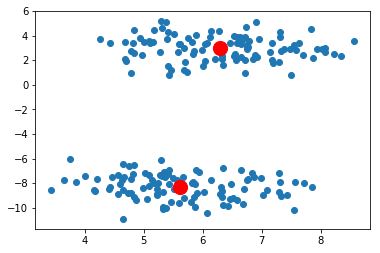

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r',s=200)
plt.show()

## How does this work?



So how does `KMeans` work?  First we initialize (randomly?) centers
for our clusters.

Then we start looping.  What do we do during each iteration?  

For each point, we assign to each point the cluster center nearest to
it; then we move the cluster centers to the average location of the
points assigned to it (hence k-**means**).  We could play the same game
with medians (and produce the so-called &ldquo;k-medians&rdquo; algorithm).



## Let's implement it!



We randomly choose centers.  One way to do this is to randomly choose
data from the data set; this is the &ldquo;Forgy method.&rdquo;



In [7]:
cluster_centers = X[np.random.choice(len(X),size=K)]

For each point, we figure out which cluster center is nearest to it.



In [8]:
def closest(X, cluster_centers):
    distances = np.linalg.norm((X - cluster_centers[:, np.newaxis]), axis=2)
    return np.argmin(distances, axis=0)

Now we find the new centers.



In [9]:
def new_centers(X, cluster_centers):
    c = closest(X, cluster_centers)
    return np.array([X[c==k].mean(axis=0) for k in range(K)])

Now we can set up the algorithm.



In [10]:
def my_kmeans(X):
    cluster_centers = X[np.random.choice(len(X),size=K)]
    while True:
        moved = new_centers(X, cluster_centers)
        if np.linalg.norm( moved - cluster_centers ) < 0.001:
             return cluster_centers
        cluster_centers = moved

my_kmeans(X)

array([[ 5.62035125, -8.27373046],
       [ 6.29874691,  2.97970631]])

Is this really what `scikit-learn` is doing?



In [11]:
kmeans.cluster_centers_

array([[ 6.29874691,  2.97970631],
       [ 5.62035125, -8.27373046]])

## Homework



Use `numpy` to produce a random dataset which consists of a
ring-shaped region around a blob.

Do you expect k-means will be able to identify such clusters?

